In [2]:
import pandas as pd
import time

In [3]:
file_path = 'C:\\Users\\thiago.rodrigues\\UFO\\nuforc_reports.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
print(df.head)

<bound method NDFrame.head of                                                   summary country  \
0                                          MADAR Node 100     USA   
1       Steady flashing object with three lights hover...     USA   
2       Group of several orange lights, seemingly circ...     USA   
3       Dropped in flashed a few times and shot off 5 ...     USA   
4       Location: While traveling in a TGV, from Lille...  France   
...                                                   ...     ...   
141256  See craft every evening when I get out of work...     USA   
141257                                      MADAR Node 70     USA   
141258  A very small white light hovering above the cl...     USA   
141259  I was young. You know what? It was pretty fuck...     USA   
141260  While driving at night, I watched two blue-gre...     USA   

                     city state            date_time   shape    duration  \
0       Mountlake Terrace    WA  2019-06-23T18:53:00     NaN     

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

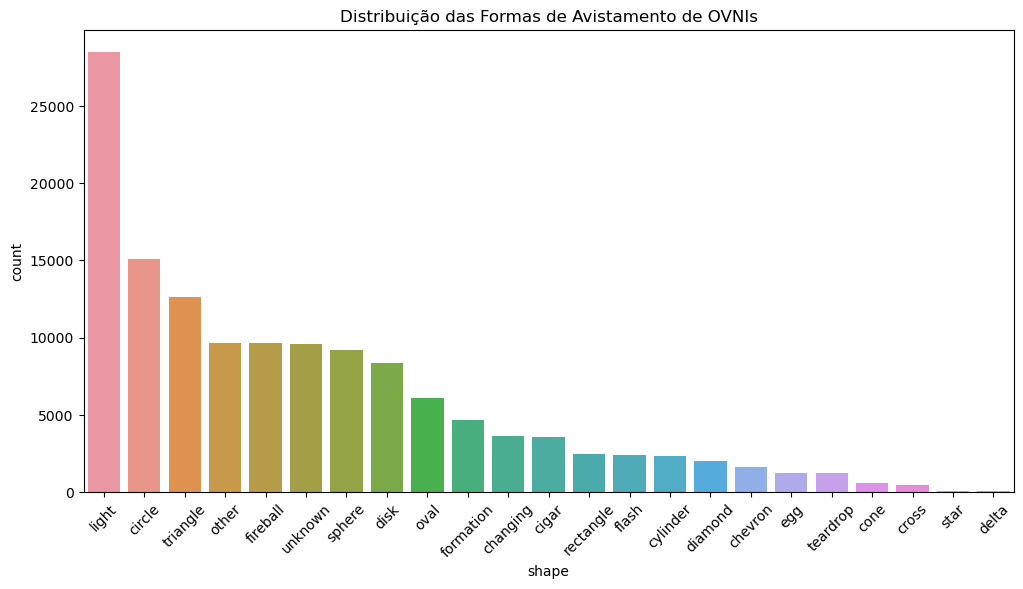

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='shape', data=df, order=df['shape'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribuição das Formas de Avistamento de OVNIs')
plt.show()


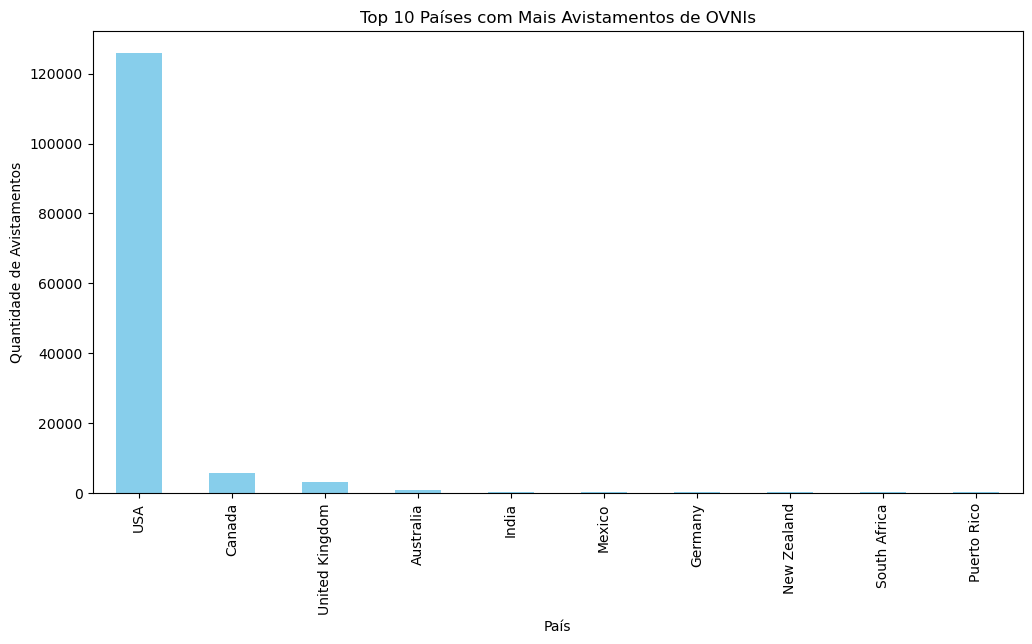

In [8]:
country_counts = df['country'].value_counts()
top_countries = country_counts.head(10)
top_countries.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Países com Mais Avistamentos de OVNIs')
plt.xlabel('País')
plt.ylabel('Quantidade de Avistamentos')
plt.show()

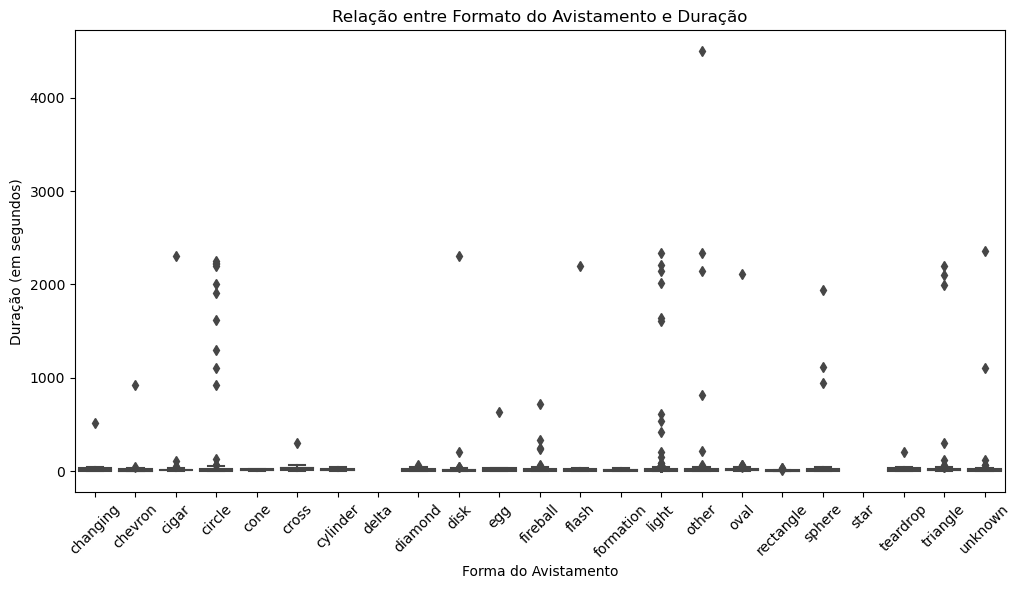

In [9]:
# Converta a coluna 'duration' para um formato numérico (se ainda não estiver)
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')  # Trata valores não numéricos como NaN

# Converta a coluna 'shape' para uma categoria
df['shape'] = df['shape'].astype('category')

# Agora, tente gerar o gráfico de caixa novamente
plt.figure(figsize=(12, 6))
sns.boxplot(x='shape', y='duration', data=df)
plt.xticks(rotation=45)
plt.title('Relação entre Formato do Avistamento e Duração')
plt.xlabel('Forma do Avistamento')
plt.ylabel('Duração (em segundos)')
plt.show()


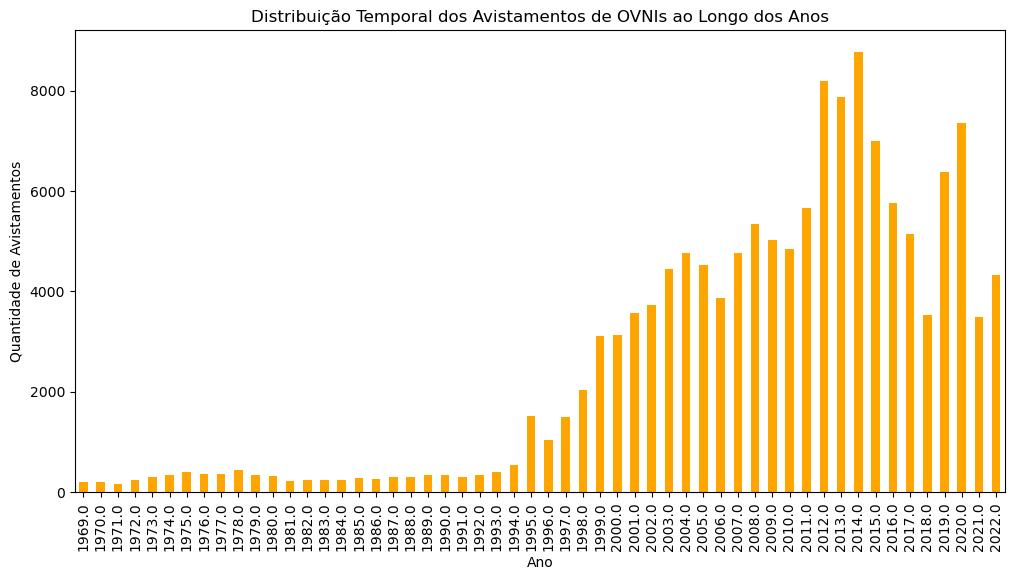

In [10]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].dt.year
plt.figure(figsize=(12, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Distribuição Temporal dos Avistamentos de OVNIs ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Avistamentos')
plt.show()


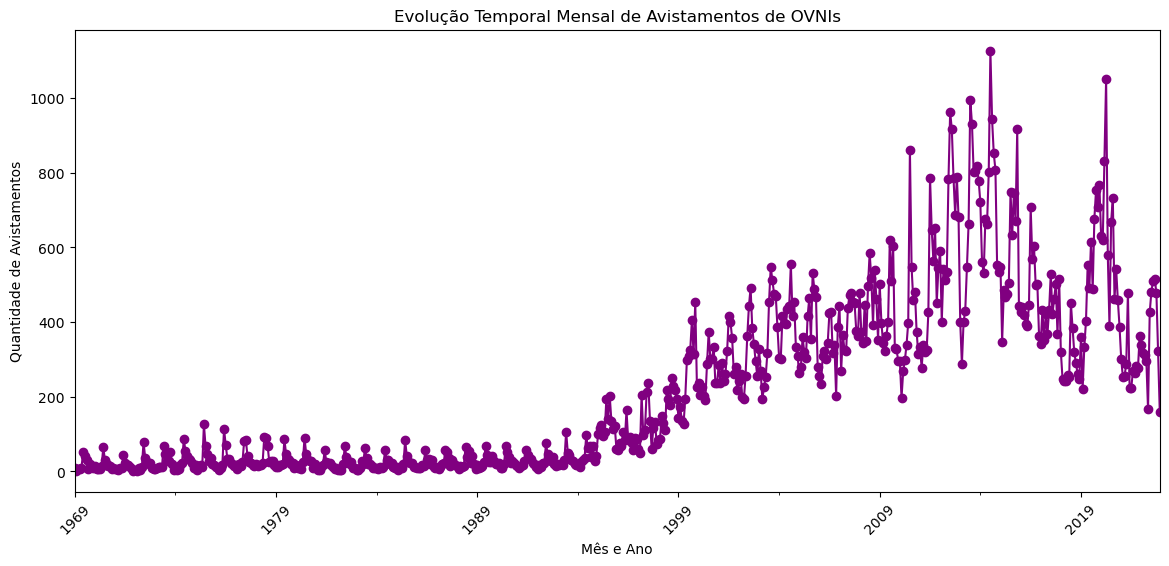

In [11]:
# Certifique-se de que a coluna 'date_time' é do tipo datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Crie uma coluna para represen tar o mês e o ano
df['month_year'] = df['date_time'].dt.to_period('M')

# Conte o número de avistamentos por mês e ano
monthly_counts = df['month_year'].value_counts().sort_index()

#  gráfico de linha
plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Evolução Temporal Mensal de Avistamentos de OVNIs')
plt.xlabel('Mês e Ano')
plt.ylabel('Quantidade de Avistamentos')
plt.xticks(rotation=45)
plt.show()


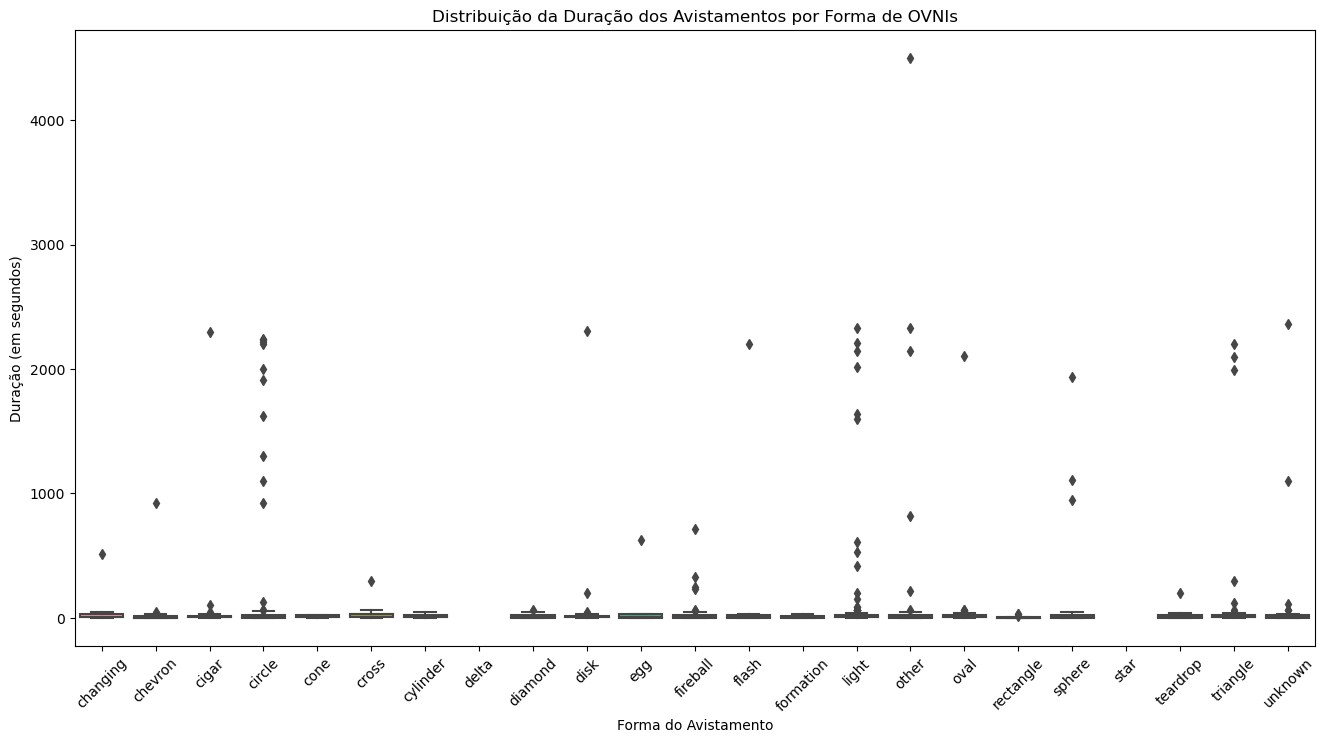

In [12]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='shape', y='duration', data=df)
plt.xticks(rotation=45)
plt.title('Distribuição da Duração dos Avistamentos por Forma de OVNIs')
plt.xlabel('Forma do Avistamento')
plt.ylabel('Duração (em segundos)')
plt.show()


In [13]:
plt.figure(figsize=(14, 8))
heatmap_data_states = df['state'].value_counts().reset_index()
heatmap_data_states.columns = ['state', 'count']
sns.heatmap(heatmap_data_states.pivot('state', 'count'), cmap='Blues', annot=True, fmt=".0f", cbar_kws={'label': 'Quantidade de Avistamentos'})
plt.title('Mapa de Calor da Contagem de Avistamentos por Estado')
plt.xlabel('Quantidade de Avistamentos')
plt.ylabel('Estado')
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 3 were given

<Figure size 1400x800 with 0 Axes>

In [ ]:
df['hour'] = df['date_time'].dt.hour
plt.figure(figsize=(14, 6))
hourly_counts = df['hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', color='teal')
plt.title('Distribuição Temporal Diária de Avistamentos de OVNIs')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Avistamentos')
plt.xticks(rotation=0)
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hour', y='duration', data=df, alpha=0.5)
plt.title('Correlação entre Duração e Hora do Dia dos Avistamentos de OVNIs')
plt.xlabel('Hora do Dia')
plt.ylabel('Duração (em segundos)')
plt.show()


In [ ]:
plt.figure(figsize=(16, 8))
df['year'] = df['date_time'].dt.year
shape_by_year = df.groupby(['year', 'shape']).size().unstack()
shape_by_year.plot(kind='bar', stacked=True, cmap='viridis', figsize=(16, 8))
plt.title('Distribuição das Formas de Avistamento ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Avistamentos')
plt.legend(title='Forma do Avistamento', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
plt.figure(figsize=(16, 8))
df['year'] = df['date_time'].dt.year
shape_by_year = df.groupby(['year', 'shape']).size().unstack()

# Usando gráfico de área empilhada
shape_by_year.plot(kind='area', stacked=True, cmap='tab20', figsize=(16, 8))

plt.title('Distribuição das Formas de Avistamento ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Avistamentos')
plt.legend(title='Forma do Avistamento', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
plt.figure(figsize=(16, 8))
df['year'] = df['date_time'].dt.year
shape_by_year = df.groupby(['year', 'shape']).size().unstack()

# Usando gráfico de linhas
shape_by_year.plot(kind='line', marker='o', figsize=(16, 8))

plt.title('Evolução das Formas de Avistamento ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Avistamentos')
plt.legend(title='Forma do Avistamento', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
plt.figure(figsize=(16, 8))
top_shapes = df['shape'].value_counts().head(10)
top_shapes.plot(kind='bar', color='teal')
plt.title('Top 10 Formas Mais Comuns de Avistamentos de OVNIs')
plt.xlabel('Forma do Avistamento')
plt.ylabel('Quantidade de Avistamentos')
plt.show()


In [ ]:
plt.figure(figsize=(14, 6))
us_states_counts = df[df['country'] == 'us']['state'].value_counts()
us_states_counts.plot(kind='bar', color='salmon')
plt.title('Distribuição de Avistamentos de OVNIs por Estado nos EUA')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Avistamentos')
plt.show()


In [ ]:
# verificar dados EUA
us_states_data = df[df['country'] == 'USA']['state'].unique()
print(us_states_data)


In [ ]:
state_mapping = {
    'WA': 'WA',
    'CT': 'CT',
    'VA': 'VA',
    'MI': 'MI',
    'CA': 'CA',
    'CO': 'CO',
    'MT': 'MT',
    'MO': 'MO',
    'IN': 'IN',
    'MS': 'MS',
    'TX': 'TX',
    'IL': 'IL',
    'NC': 'NC',
    'GA': 'GA',
    'AZ': 'AZ',
    'AL': 'AL',
    'TN': 'TN',
    'NM': 'NM',
    'FL': 'FL',
    'NJ': 'NJ',
    'MD': 'MD',
    'WY': 'WY',
    'LA': 'LA',
    'IA': 'IA',
    'NY': 'NY',
    'WI': 'WI',
    'UT': 'UT',
    'KY': 'KY',
    'MA': 'MA',
    'ID': 'ID',
    'DE': 'DE',
    'MN': 'MN',
    'SC': 'SC',
    'WV': 'WV',
    'SD': 'SD',
    'PA': 'PA',
    'OR': 'OR',
    'AR': 'AR',
    'NE': 'NE',
    'OH': 'OH',
    'ME': 'ME',
    'ND': 'ND',
    'NV': 'NV',
    'KS': 'KS',
    'NH': 'NH',
    'RI': 'RI',
    'OK': 'OK',
    'VT': 'VT',
    'AK': 'AK',
    'HI': 'HI',
    'DC': 'DC',
    'GUAM': 'GU',
    'AMERICAN SAMOA': 'AS',
    'UNITED STATES VIRGIN ISLANDS': 'VI',
    'QUINTANA ROO': 'QR'
}

#  mapeamento à coluna 'state'
df['state'] = df['state'].map(state_mapping)


In [ ]:
plt.figure(figsize=(14, 6))
us_states_counts = df[df['country'] == 'USA']['state'].value_counts()

if not us_states_counts.empty:
    us_states_counts.plot(kind='bar', color='salmon')
    plt.title('Distribuição de Avistamentos de OVNIs por Estado nos EUA')
    plt.xlabel('Estado')
    plt.ylabel('Quantidade de Avistamentos')
    plt.show()
else:
    print('Não há dados de avistamentos nos EUA no conjunto de dados.')


In [ ]:
plt.figure(figsize=(10, 12))
us_states_counts.plot(kind='barh', color='salmon')
plt.title('Distribuição de Avistamentos de OVNIs por Estado nos EUA')
plt.xlabel('Quantidade de Avistamentos')
plt.ylabel('Estado')
plt.show()


In [ ]:
plt.figure(figsize=(10, 12))

# Ordenar o DataFrame 
us_states_counts_sorted = us_states_counts.sort_values(ascending=True)

us_states_counts_sorted.plot(kind='barh', color='salmon')
plt.title('Distribuição de Avistamentos de OVNIs por Estado nos EUA')
plt.xlabel('Quantidade de Avistamentos')
plt.ylabel('Estado')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar todas as descrições de avistamentos
all_text = ' '.join(df['text'].dropna())

# Criar e exibir uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras nas Descrições de Avistamentos')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# concat todas as descrições de avistamentos
all_text = ' '.join(df['text'].dropna())

# criar e exibir uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras nas Descrições de Avistamentos')
plt.show()


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['month_year'] = df['date_time'].dt.to_period('M')

monthly_counts = df['month_year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Evolução Temporal Mensal de Avistamentos de OVNIs')
plt.xlabel('Mês e Ano')
plt.ylabel('Quantidade de Avistamentos')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['month_year'] = df['date_time'].dt.to_period('M')

monthly_counts = df['month_year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Evolução Temporal Mensal de Avistamentos de OVNIs')
plt.xlabel('Mês e Ano')
plt.ylabel('Quantidade de Avistamentos')

# ajustar os rótulos dos meses para melhor legibilidade
plt.xticks(rotation=45, ha='right')  # ha='right' alinha os rótulos à direita

plt.show()


In [ ]:
# criar coluna para hora do dia
df['hour_of_day'] = df['date_time'].dt.hour

# mapear as horas para categorias (manhã, tarde, noite, madrugada)
hour_categories = pd.cut(df['hour_of_day'], bins=[0, 6, 12, 18, 24], labels=['Madrugada', 'Manhã', 'Tarde', 'Noite'])

# adicionar coluna com categorias ao DataFrame
df['day_period'] = hour_categories

# criar mapa de calor
heatmap_data_day_period = df.pivot_table(index='day_period', columns='hour_of_day', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data_day_period, cmap='YlGnBu', annot=True, fmt="d", cbar_kws={'label': 'Quantidade de Avistamentos'})
plt.title('Mapa de Calor por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Período do Dia')
plt.show()


In [14]:
plt.figure(figsize=(14, 8))
us_states_counts = df[df['country'] == 'us']['state'].value_counts().reset_index()
us_states_counts.columns = ['state', 'count']

# filtrar apenas os estados válidos (remover 'nan' e outros valores não válidos)
valid_states = us_states_counts[~us_states_counts['state'].isna()]

# criar um mapa de calor apenas com estados válidos
heatmap_table = pd.pivot_table(valid_states, values='count', index='state', aggfunc=np.sum)
sns.heatmap(heatmap_table, cmap='Blues', annot=True, fmt=".0f", cbar_kws={'label': 'Quantidade de Avistamentos'})
plt.title('Mapa de Calor da Contagem de Avistamentos por Estado')
plt.xlabel('Estado')
plt.show()


NameError: name 'np' is not defined

<Figure size 1400x800 with 0 Axes>

In [15]:
import plotly.express as px

# filtrar apenas os estados válidos (remover 'nan' e outros valores não válidos)
valid_states = us_states_counts.dropna()

fig = px.choropleth(
    valid_states,
    locations='state',
    locationmode='USA-states',
    color='count',
    color_continuous_scale='Blues',
    scope='usa',
    labels={'count': 'Quantidade de Avistamentos'}
)

fig.update_layout(
    title='Mapa de Calor da Contagem de Avistamentos por Estado',
    geo=dict(scope='usa')
)

fig.show()


In [16]:
print(valid_states)


Empty DataFrame
Columns: [state, count]
Index: []


In [17]:
print(df['state'].unique())


['WA' 'CT' 'VA' 'MI' nan 'CA' 'CO' 'MT' 'MO' 'IN' 'MS' 'TX' 'IL' 'NC' 'GA'
 'AZ' 'AL' 'TN' 'NM' 'FL' 'NJ' 'MD' 'WY' 'LA' 'IA' 'NY' 'NT' 'WI' 'MB'
 'UT' 'KY' 'MA' 'ID' 'DE' 'MN' 'SC' 'WV' 'SD' 'PA' 'ON' 'OR' 'AR' 'NE'
 'BC' 'OH' 'ME' 'ND' 'NV' 'KS' 'AB' 'NH' 'RI' 'OK' 'VT' 'ULSTER' 'GLASGOW'
 'AK' 'NEW SOUTH WALES' 'PERM KRAI' 'CANELONES DEPARTMENT' 'CUMBRIA'
 'MPUMALANGA' 'WIRRAL' 'ZAJECAR DISTRICT' 'ANDAMAN AND NICOBAR ISLANDS'
 'LONDON BOROUGH OF BROMLEY' 'CANTERBURY REGION' 'NORTHLAND REGION'
 'COUNTY OFFALY' 'HIGHLAND' 'NS' 'SOUTH LANARKSHIRE' 'ANGUS'
 'NORTH HOLLAND' 'HAINAN' 'BEROUN DISTRICT' 'SÃO PAULO' 'CHESHIRE EAST'
 'SK' 'QUEBEC' 'CÓRDOBA PROVINCE' 'HI' 'YUCATÁN' 'NEW YORK\n\n\n' 'WALES'
 'QC' 'EAST RIDING OF YORKSHIRE' 'SURREY' 'SOUTH AUSTRALIA' 'NB' 'NORFOLK'
 'ESSEX' 'HAMPSHIRE' 'SICILY' 'QUEENSLAND' 'SCOTLAND' 'BÀ R?A-VUNG TÀU'
 'LEEDS' 'MAHARASHTRA' 'STAFFORDSHIRE' 'HERTFORDSHIRE'
 'LONDON BOROUGH OF WANDSWORTH' 'DC' 'CENTRAL DEPARTMENT' 'UNITED KINGDOM'
 'SHANDONG' 'GU

In [18]:
print(df[df['country'] == 'us']['state'].value_counts())


Series([], Name: count, dtype: int64)


In [19]:
df_cleaned = df[df['country'] == 'us'].copy()
df_cleaned['state'] = df_cleaned['state'].replace({'GUAM': 'GU', 'AMERICAN SAMOA': 'AS', 'UNITED STATES VIRGIN ISLANDS': 'VI', 'QUINTANA ROO': 'QR'})
us_states_counts = df_cleaned['state'].value_counts()


In [20]:
valid_states = us_states_counts.dropna().reset_index()
valid_states.columns = ['state', 'count']
valid_states['state'] = valid_states['state'].map(state_mapping)


NameError: name 'state_mapping' is not defined

In [ ]:
# criar uma cópia do DataFrame filtrando para o país 'us'
df_cleaned = df[df['country'] == 'us'].copy()

# substituir valores nulos na coluna 'state' por um valor padrão, por exemplo,
df_cleaned['state'].fillna('UNKNOWN', inplace=True)

# substituir valores no DataFrame após a manipulação
df_cleaned['state'] = df_cleaned['state'].replace({'GUAM': 'GU', 'AMERICAN SAMOA': 'AS', 'UNITED STATES VIRGIN ISLANDS': 'VI', 'QUINTANA ROO': 'QR'})

# realizar a contagem dos estados
us_states_counts = df_cleaned['state'].value_counts()

# criar DataFrame 'valid_states'
valid_states = us_states_counts.reset_index()
valid_states.columns = ['state', 'count']
valid_states['state'] = valid_states['state'].map(state_mapping)


In [ ]:
valid_states = valid_states.dropna()


In [ ]:
print(df.head())

In [ ]:
import plotly.express as px

# substituir valores nulos na coluna 'state'
df['state'].fillna('UNKNOWN', inplace=True)

# substituir valores no DataFrame após a manipulação
df['state'] = df['state'].replace({'GUAM': 'GU', 'AMERICAN SAMOA': 'AS', 'UNITED STATES VIRGIN ISLANDS': 'VI', 'QUINTANA ROO': 'QR'})

# lista completa de estados
all_states = ['WA', 'CT', 'VA', 'MI', 'CA', 'CO', 'MT', 'MO', 'IN', 'MS', 'TX', 'IL', 'NC', 'GA', 'AZ', 'AL', 'TN', 'NM', 'FL', 'NJ', 'MD', 'WY', 'LA', 'IA', 'NY', 'WI', 'UT', 'KY', 'MA', 'ID', 'DE', 'MN', 'SC', 'WV', 'SD', 'PA', 'OR', 'AR', 'NE', 'OH', 'ME', 'ND', 'NV', 'KS', 'NH', 'RI', 'OK', 'VT', 'AK', 'HI', 'DC', 'GU', 'AS', 'VI', 'QR']

# filtrar o DataFrame apenas para os estados dos EUA
us_states_df = df[df['state'].isin(all_states)]

# realizar a contagem dos estados
us_states_counts = us_states_df['state'].value_counts()

#  DataFrame 'valid_states'
valid_states = us_states_counts.reset_index()
valid_states.columns = ['state', 'count']

# mapear os códigos dos estados para os nomes completos
valid_states['state'] = valid_states['state'].map(state_mapping)

# Verificar os dados do DataFrame
#print(valid_states)

# Gerar o mapa de calor
fig = px.choropleth(
    valid_states,
    locations='state',
    locationmode='USA-states',
    color='count',
    color_continuous_scale='Blues',
    scope='usa',
    labels={'count': 'Quantidade de Avistamentos'}
)

fig.update_layout(
    title='Mapa de Calor da Contagem de Avistamentos por Estado',
    geo=dict(scope='usa')
)

fig.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converter 'date_time' para tipo datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Extrair hora e dia da semana
df['hour_of_day'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.day_name()

# Criar um mapa de calor
heatmap_table = pd.pivot_table(df, values='duration', index='hour_of_day', columns='day_of_week', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_table, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Número de Avistamentos'})
plt.title('Mapa de Calor de Avistamentos por Hora e Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Hora do Dia')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Filtrar dados geográficos
df_geo = df[['city_latitude', 'city_longitude']].dropna()

# Normalizar dados para KMeans
df_geo_normalized = (df_geo - df_geo.mean()) / df_geo.std()

# Aplicar KMeans para agrupar
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_geo_normalized)

# Adicionar coluna de grupos ao DataFrame original
df_geo['cluster'] = kmeans.labels_

# Plotar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_geo, x='city_longitude', y='city_latitude', hue='cluster', palette='viridis', s=50)
plt.title('Agrupamento Geográfico de Avistamentos de OVNIs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42).fit(df_geo_normalized)


In [ ]:
print(kmeans.cluster_centers_)


In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar dados geográficos
df_geo = df[['city_latitude', 'city_longitude']].dropna()

# Normalizar dados para KMeans
df_geo_normalized = (df_geo - df_geo.mean()) / df_geo.std()

# Aplicar KMeans para agrupar
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42).fit(df_geo_normalized)

# Adicionar coluna de grupos ao DataFrame original
df_geo['cluster'] = kmeans.labels_

# Plotar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_geo, x='city_longitude', y='city_latitude', hue='cluster', palette='viridis', s=50)
plt.title('Agrupamento Geográfico de Avistamentos de OVNIs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Verificar valores nulos na coluna 'shape'
missing_shapes = df['shape'].isnull().sum()
print(f"Número de valores nulos na coluna 'shape': {missing_shapes}")

# Imprimir formatos únicos, excluindo os nulos
unique_shapes = df['shape'].dropna().unique()
print(unique_shapes)


In [ ]:
# Imprimir valores únicos na coluna 'shape' e contar a quantidade de cada um
shape_counts = df['shape'].value_counts()
print(shape_counts)


In [ ]:
# Criar dicionário de tradução para os formatos
shape_mapping = {
    'light': 'Luz',
    'circle': 'Círculo',
    'triangle': 'Triângulo',
    'fireball': 'Bola de Fogo',
    'other': 'Outro',
    'unknown': 'Desconhecido',
    'sphere': 'Esfera',
    'disk': 'Disco',
    'oval': 'Oval',
    'formation': 'Formação',
    'changing': 'Mudando',
    'cigar': 'Cigarro',
    'rectangle': 'Retângulo',
    'flash': 'Flash',
    'cylinder': 'Cilindro',
    'diamond': 'Diamante',
    'chevron': 'Chevron',
    'egg': 'Ovo',
    'teardrop': 'Gota',
    'cone': 'Cone',
    'cross': 'Cruz',
    'star': 'Estrela',
    'delta': 'Delta'
}

# Criar uma nova coluna 'shape_translated' com os valores traduzidos
df['shape_translated'] = df['shape'].map(shape_mapping)

# Imprimir os primeiros registros para verificar
print(df[['shape', 'shape_translated']].head())


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='shape_translated', data=df, order=df['shape_translated'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribuição das Formas de Avistamento de OVNIs')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='shape_translated', y='duration', data=df)
plt.xticks(rotation=45)
plt.title('Relação entre Formato do Avistamento e Duração')
plt.xlabel('Forma do Avistamento')
plt.ylabel('Duração (em segundos)')
plt.show()


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].dt.year
plt.figure(figsize=(12, 6))
ax = df['year'].value_counts().sort_index().plot(kind='bar', color='orange')

# Ajuste da formatação dos rótulos no eixo x
ax.set_xticklabels([str(int(label)) for label in df['year'].value_counts().sort_index().index])

plt.title('Distribuição Temporal dos Avistamentos de OVNIs ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Avistamentos')
plt.show()


In [ ]:
df['hour'] = df['date_time'].dt.hour.astype(int)
plt.figure(figsize=(14, 6))
hourly_counts = df['hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', color='teal')
plt.title('Distribuição Temporal Diária de Avistamentos de OVNIs')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Avistamentos')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Preencher valores não finitos com 0
df['hour'] = df['hour'].fillna(0)

# Converter a coluna 'hour' para tipo inteiro
df['hour'] = df['hour'].astype(int)

# Plotar o gráfico
plt.figure(figsize=(14, 6))
hourly_counts = df['hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', color='teal')
plt.title('Distribuição Temporal Diária de Avistamentos de OVNIs')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Avistamentos')
plt.xticks(rotation=0)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeamento dos nomes dos dias da semana para o português
day_of_week_mapping = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Converter 'date_time' para tipo datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Extrair hora e dia da semana
df['hour_of_day'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.day_name()

# Mapear os nomes dos dias da semana para o português
df['day_of_week'] = df['day_of_week'].map(day_of_week_mapping)

# Criar um mapa de calor
heatmap_table = pd.pivot_table(df, values='duration', index='hour_of_day', columns='day_of_week', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_table, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Número de Avistamentos'})
plt.title('Mapa de Calor de Avistamentos por Hora e Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Hora do Dia')
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
df['year'].value_counts().sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Distribuição Temporal dos Avistamentos de OVNIs ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Avistamentos')
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px

# substituir valores nulos na coluna 'state'
df['state'].fillna('UNKNOWN', inplace=True)

# substituir valores no DataFrame após a manipulação
df['state'] = df['state'].replace({'GUAM': 'GU', 'AMERICAN SAMOA': 'AS', 'UNITED STATES VIRGIN ISLANDS': 'VI', 'QUINTANA ROO': 'QR'})

# lista completa de estados
all_states = ['WA', 'CT', 'VA', 'MI', 'CA', 'CO', 'MT', 'MO', 'IN', 'MS', 'TX', 'IL', 'NC', 'GA', 'AZ', 'AL', 'TN', 'NM', 'FL', 'NJ', 'MD', 'WY', 'LA', 'IA', 'NY', 'WI', 'UT', 'KY', 'MA', 'ID', 'DE', 'MN', 'SC', 'WV', 'SD', 'PA', 'OR', 'AR', 'NE', 'OH', 'ME', 'ND', 'NV', 'KS', 'NH', 'RI', 'OK', 'VT', 'AK', 'HI', 'DC', 'GU', 'AS', 'VI', 'QR']

# filtrar o DataFrame apenas para os estados dos EUA
us_states_df = df[df['state'].isin(all_states)]

# realizar a contagem dos estados
us_states_counts = us_states_df['state'].value_counts()

#  DataFrame 'valid_states'
valid_states = us_states_counts.reset_index()
valid_states.columns = ['state', 'count']

# mapear os códigos dos estados para os nomes completos
valid_states['state'] = valid_states['state'].map(state_mapping)

# Verificar os dados do DataFrame
#print(valid_states)

# Gerar o mapa de calor
fig = px.choropleth(
    valid_states,
    locations='state',
    locationmode='USA-states',
    color='count',
    color_continuous_scale='Blues',
    scope='usa',
    labels={'count': 'Quantidade de Avistamentos'}
)

fig.update_layout(
    title='Mapa de Calor da Contagem de Avistamentos por Estado',
    geo=dict(scope='usa')
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Substituir valores nulos na coluna 'state'
df['state'].fillna('UNKNOWN', inplace=True)

# Substituir valores no DataFrame após a manipulação
df['state'] = df['state'].replace({'GUAM': 'GU', 'AMERICAN SAMOA': 'AS', 'UNITED STATES VIRGIN ISLANDS': 'VI', 'QUINTANA ROO': 'QR'})

# Lista completa de estados
all_states = ['WA', 'CT', 'VA', 'MI', 'CA', 'CO', 'MT', 'MO', 'IN', 'MS', 'TX', 'IL', 'NC', 'GA', 'AZ', 'AL', 'TN', 'NM', 'FL', 'NJ', 'MD', 'WY', 'LA', 'IA', 'NY', 'WI', 'UT', 'KY', 'MA', 'ID', 'DE', 'MN', 'SC', 'WV', 'SD', 'PA', 'OR', 'AR', 'NE', 'OH', 'ME', 'ND', 'NV', 'KS', 'NH', 'RI', 'OK', 'VT', 'AK', 'HI', 'DC', 'GU', 'AS', 'VI', 'QR']

# Filtrar o DataFrame apenas para os estados dos EUA
us_states_df = df[df['state'].isin(all_states)]

# Realizar a contagem dos estados
us_states_counts = us_states_df['state'].value_counts()

#  DataFrame 'valid_states'
valid_states = us_states_counts.reset_index()
valid_states.columns = ['state', 'count']

# Mapear os códigos dos estados para os nomes completos
valid_states['state'] = valid_states['state'].map(state_mapping)

# Verificar os dados do DataFrame
#print(valid_states)

# Gerar o mapa de calor
fig = px.choropleth(
    valid_states,
    locations='state',
    locationmode='USA-states',
    color='count',
    color_continuous_scale='Blues',
    scope='usa',
    labels={'count': 'Quantidade de Avistamentos'}
)

fig.update_layout(
    title='Mapa de Calor da Contagem de Avistamentos por Estado',
    geo=dict(scope='usa')
)

fig.show()


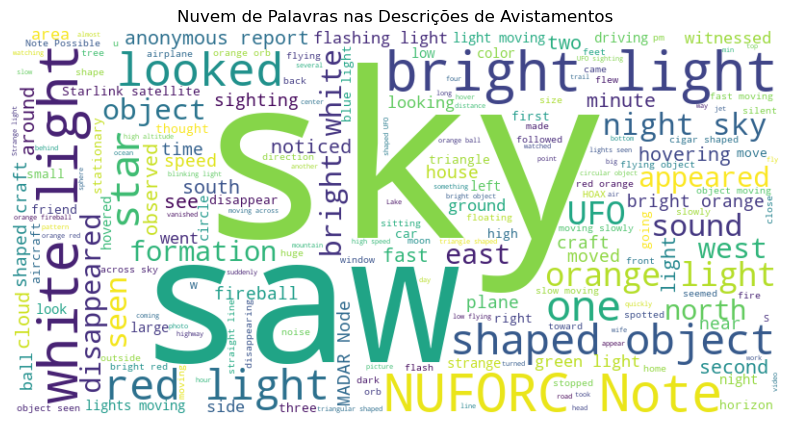

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenar todas as descrições de avistamentos
all_text = ' '.join(df['summary'].dropna())

# Criar e exibir uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras nas Descrições de Avistamentos')
plt.show()
